In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## Описание данных
Таблица `products`:
- `product_id` - id товара
- `level1` - категория
- `level2` - подкатегория
- `name` - наименование товара
  
Таблица `orders`:
- `order_id` - номер чека
- `accepted_at` - дата и время чека
- `product_id` - id товара
- `quantity` - кол-во товара в чеке
- `regular_price` - регулярная цена
- `price` - текущая цена
- `cost_price` - закупочная цена

## Подготовка данных

In [4]:
orders = pd.read_excel('../data/orders.xlsx', sheet_name="Лист1")
orders

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130
...,...,...,...,...,...,...,...
3318,1517405750,2022-01-13 19:29:44,79337,2,105,105,54
3319,1517676281,2022-01-13 08:21:53,79337,1,105,105,54
3320,1517545392,2022-01-13 13:16:21,11897,1,513,513,392
3321,1517658904,2022-01-13 08:50:25,6392,2,79,79,45


In [5]:
orders.dtypes

order_id                  int64
accepted_at      datetime64[ns]
product_id                int64
quantity                  int64
regular_price             int64
price                     int64
cost_price                int64
dtype: object

In [6]:
orders.isnull().sum()

order_id         0
accepted_at      0
product_id       0
quantity         0
regular_price    0
price            0
cost_price       0
dtype: int64

In [7]:
products = pd.read_excel('../data/products.xlsx', sheet_name="Лист1")
products

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio
...,...,...,...,...
40147,112937,Безалкогольные напитки,Напитки,Напиток Venom
40148,112997,Бакалея,Пряности,Приправа Adjika Family
40149,113057,Бакалея,Пряности,Соль Кулина
40150,113117,Кулинария,Готовые блюда,Салат Хлеб Насущный


In [8]:
products.dtypes

product_id     int64
level1        object
level2        object
name          object
dtype: object

In [9]:
products.isnull().sum()

product_id      0
level1          0
level2          0
name          212
dtype: int64

In [10]:
order_product_details = orders.merge(products, on='product_id')
order_product_details

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
...,...,...,...,...,...,...,...,...,...,...
3013,1517405750,2022-01-13 19:29:44,79337,2,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат
3014,1517676281,2022-01-13 08:21:53,79337,1,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат
3015,1517545392,2022-01-13 13:16:21,11897,1,513,513,392,Продукция для животных,Товары для кошек,Корм Perfect Fit
3016,1517658904,2022-01-13 08:50:25,6392,2,79,79,45,Мучные кондитерские изделия,Хлебцы,Хлебцы Dr. Korner


In [11]:
order_product_details.isnull().sum()

order_id         0
accepted_at      0
product_id       0
quantity         0
regular_price    0
price            0
cost_price       0
level1           0
level2           0
name             8
dtype: int64

## Самая ходовая товарная группа
Посмотрим, по какой категории товаров продано больше всего позиций.

- Подкрепим свой ответ таблицей, в которой рассчитано количество проданных штук товара в каждой товарной категории.
- Дополнительно построим на основании этой таблицы горизонтальный `barchart`.
- Проверим, чтобы все подписи на графике выглядели читаемо и понятно, чтобы он сходу был понятен стороннему наблюдателю.

In [12]:
# Таблица с категориями
top_categories = order_product_details.groupby('level1', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \

top_categories.head()

,level1,quantity
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239


In [13]:
# Настройки отображения графиков
sns.set(style='whitegrid', font_scale=1)

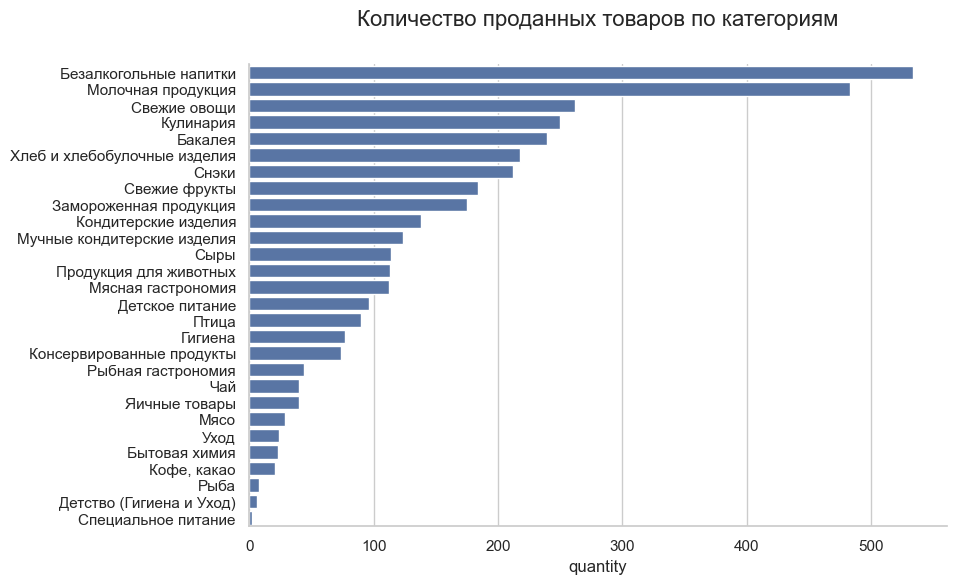

In [14]:
# Горизонтальный barchart
plt.figure(figsize=(9, 6))
plt.title("Количество проданных товаров по категориям", pad=28, fontdict={'fontsize': 16})
sns.barplot(top_categories, y='level1', x='quantity')
plt.ylabel('')
sns.despine()

## Распределение продаж по подкатегориям
Оценим распределение количества проданных позиций в каждой товарной категории (`level1`) по подкатегориям (`level2`).<br>
Проиллюстрируем результат в виде расчетной таблицы.

In [15]:
# Расчетная таблица
sales_by_category_subcategory = order_product_details \
    .groupby(['level1', 'level2'], as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) 

sales_by_category_subcategory.head(10)

,level1,level2,quantity
13,Безалкогольные напитки,Напитки,252
54,Кулинария,Готовые блюда,248
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
86,Снэки,Снэки соленые,180
12,Безалкогольные напитки,Воды питьевые,162
78,Свежие овощи,"Корнеплоды, зелень и прочие овощи",157
60,Молочная продукция,Молоко и сливки,147
61,Молочная продукция,Молочно-десертные продукты,116
81,Свежие фрукты,"Цитрусовые, семечковые и прочие плоды",108
57,Молочная продукция,Кисломолочные традиционные продукты,106


## Найдем средний чек за 13.01.2022.

In [14]:
mask = orders['accepted_at'].dt.strftime('%d.%m.%Y') == '13.01.2022'
orders[mask].groupby('order_id') \
    .apply(lambda x: (x['price'] * x['quantity']).sum(), include_groups=False) \
    .mean() \
    .round(2)

915.64

## Доля промо в заданной категории
Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой.
- Посчитаем, какую долю от общих продаж категории `Сыры` занимают промо.
- Построим пайчарт, который это проиллюстрирует. На графике будут группы, соответствующие долям и понятные подписи к ним.

In [18]:
# Доля от общих продаж
cheese_sales = order_product_details.query("level1 == 'Сыры'").copy()
cheese_sales['is_promo'] = cheese_sales['price'] < cheese_sales['regular_price']
cheese_promo_sales = cheese_sales.groupby('is_promo')['quantity'].sum()
(cheese_promo_sales.loc[True] / cheese_promo_sales.sum()).round(2)

0.31

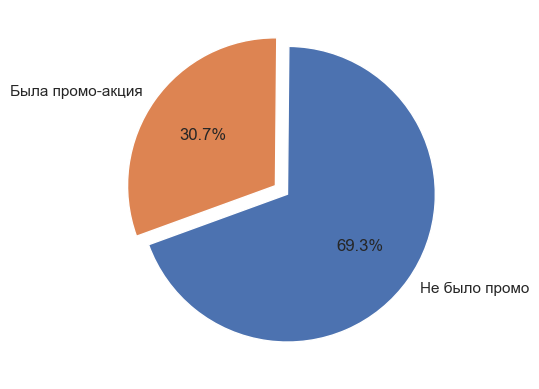

In [20]:
# Пайчарт
plt.pie(
    cheese_promo_sales.sort_values(ascending=False),
    labels=['Не было промо', 'Была промо-акция'],
    explode=[0, 0.1],
    startangle=-160,
    autopct='%1.1f%%'
)
plt.show()

## Посчитаем маржу по категориям
Будем считать маржу:
- В рублях
- В `%`<br>

Делать это будем по всем категориям `level1` и отобразим с помощью 2 горизонтальных барчартов.<br>
Все подписи сделаем читаемыми и понятными.

In [21]:
# Маржа по категориям
margin_by_category = order_product_details[['level1', 'price', 'cost_price', 'quantity']].copy()
margin_by_category['profit'] = (margin_by_category['price'] - margin_by_category['cost_price']) * margin_by_category['quantity']
margin_by_category['revenue'] = margin_by_category['price'] * margin_by_category['quantity']

margin_by_category = margin_by_category.groupby('level1', as_index=False) \
    .agg({'profit': 'sum', 'revenue': 'sum'})

margin_by_category['margin_perc'] = (margin_by_category['profit'].mul(100) / margin_by_category['revenue']).round(2)
margin_by_category = margin_by_category.drop(columns='revenue').rename(columns={'profit': 'margin_rub'})

margin_by_category.head()

,level1,margin_rub,margin_perc
0,Бакалея,8177,37.57
1,Безалкогольные напитки,20373,44.19
2,Бытовая химия,1441,26.31
3,Гигиена,2971,29.55
4,Детское питание,1817,35.69


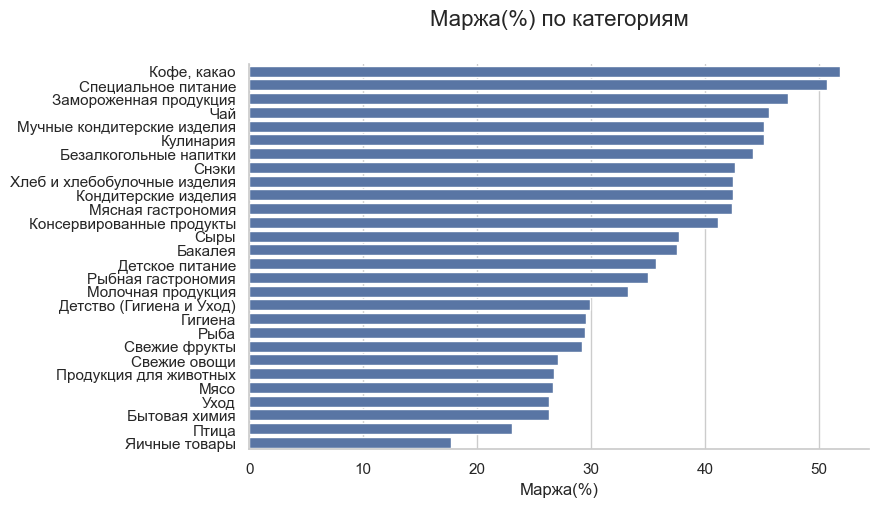

In [22]:
# Горизонтальный барчарт: Маржа(%) по категориям
plt.figure(figsize=(8, 5))
plt.title("Маржа(%) по категориям", pad=28, fontdict={'fontsize': 16})
sns.barplot(margin_by_category.sort_values('margin_perc', ascending=False), y='level1', x='margin_perc')
plt.xlabel('Маржа(%)')
plt.ylabel('')
sns.despine()

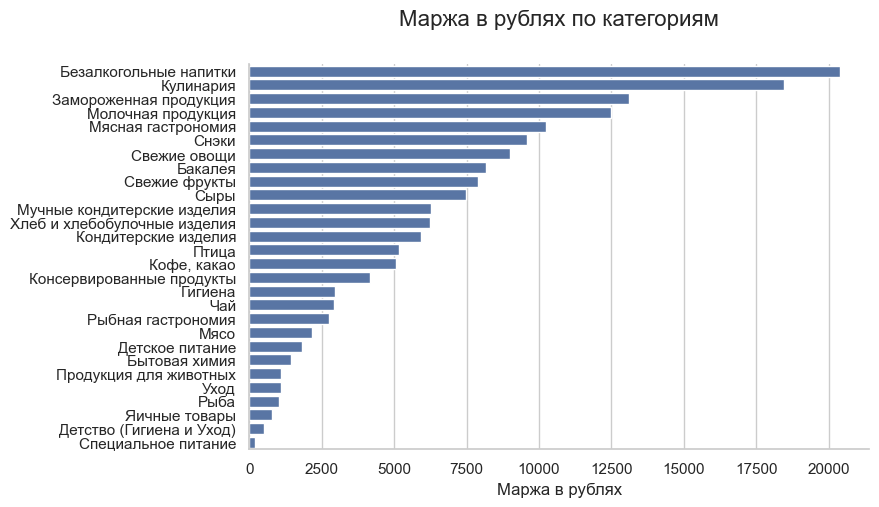

In [23]:
# Горизонтальный барчарт: Маржа в рублях по категориям
plt.figure(figsize=(8, 5))
plt.title("Маржа в рублях по категориям", pad=28, fontdict={'fontsize': 16})
sns.barplot(margin_by_category.sort_values('margin_rub', ascending=False), y='level1', x='margin_rub')
plt.xlabel('Маржа в рублях')
plt.ylabel('')
sns.despine()

## ABC анализ
- Сделаем ABC-анализ продаж по количеству
- Сделаем ABC-анализ по сумме продаж
- Сделаем столбец, в котором будет итоговая группа на основании двух анализов. Например: `AC`.<br>
 
**Важно:** ABC-анализ будем проводить по подкатегориям, а не по отдельным товарам. Имеющихся у нас данных недостаточно для качественного анализа на уровне товаров. К тому же, количество товаров слишком велико, что может также исказить результаты. А ABC-анализ по подкатегориям даст более адекватную и интерпретируемую картину.

In [24]:
# Добавляем столбец с выручкой
order_product_abc = order_product_details.copy()
order_product_abc['revenue'] = order_product_abc['price'] * order_product_abc['quantity']
order_product_abc.head(3)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,revenue
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,169
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,169
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,169


In [30]:
# Функция, которая автоматически проводит ABC-анализ
def perform_abc_analysis(df, category_col, value_col, thresholds=(0.8, 0.95)):
    """
    Проводит ABC-анализ на основе переданных столбцов:
    1. В разрезе чего проводится этот анализ
    2. Какую метрику анализируем
    """
    abc_df = df.groupby(category_col, as_index=False) \
        .agg({value_col: 'sum'}) \
        .sort_values([value_col, category_col], ascending=[False, True]) 

    abc_df['cumsum_share'] = abc_df[value_col].cumsum() / abc_df[value_col].sum()

    abc_df[f"{value_col}_abc"] = np.where(
        abc_df['cumsum_share'] < thresholds[0],
        'A',
        np.where(
            abc_df['cumsum_share'] < thresholds[1],
            'B',
            'C'
        )
    )

    abc_df.drop(columns='cumsum_share', inplace=True)
    
    return abc_df

In [31]:
# Объединяем результаты по количеству и сумме продаж
quantity_revenue_abc = perform_abc_analysis(order_product_abc, 'level2', 'quantity').merge(
    perform_abc_analysis(order_product_abc, 'level2', 'revenue'),
    on='level2'
)
quantity_revenue_abc['abc'] = quantity_revenue_abc['quantity_abc'] + quantity_revenue_abc['revenue_abc']

quantity_revenue_abc

,level2,quantity,quantity_abc,revenue,revenue_abc,abc
0,Напитки,252,A,24123,A,AA
1,Готовые блюда,248,A,40356,A,AA
2,Хлеб и хлебобулочные изделия,218,A,14724,A,AA
3,Снэки соленые,180,A,17293,A,AA
4,Воды питьевые,162,A,9141,A,AA
...,...,...,...,...,...,...
95,Попкорн,2,C,304,C,CC
96,Средства по уходу за волосами,2,C,665,C,CC
97,Субпродуктовые изделия,2,C,324,C,CC
98,Снэки сладкие,1,C,75,C,CC


In [32]:
# Результаты по итоговым группам
quantity_revenue_abc['abc'].value_counts().to_frame() \
    .reset_index() \
    .sort_values('abc')

,abc,count
1,AA,23
5,AB,5
7,AC,2
4,BA,9
2,BB,15
6,BC,4
3,CB,10
0,CC,32
